# Tagup Data Science Exercise


## Import the Libraries

All the Python Libraries necessary for the Exercise are imported here.

In [337]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter,YearLocator,MonthLocator
import numpy as np
from sklearn.cluster import KMeans
from scipy import stats
from IPython.display import display

## Read the Dataset

Use Pandas to read the data. Here, I am reading just the first machine data.


In [338]:
data = pd.read_csv('machine_0.csv', index_col=0)
print(data.head())

                                       0         1          2          3
2019-01-01 00:00:00.000000000  12.626096  8.803120 -11.809200  10.083961
2019-01-01 08:00:09.603201067  10.831994  2.816327  11.554778  21.892853
2019-01-01 16:00:19.206402134  21.083510 -0.672645 -17.839178  -1.349024
2019-01-02 00:00:28.809603201  32.294495  6.525132 -13.498586  -4.250752
2019-01-02 08:00:38.412804268  28.057100  3.691359  21.984744  13.670561


Using the info and describe commands, some more information is found out about the data like the type of data, if there's any null value and total number of rows.

In [339]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 2019-01-01 00:00:00.000000000 to 2021-09-27 00:00:00.000000000
Data columns (total 4 columns):
0    3000 non-null float64
1    3000 non-null float64
2    3000 non-null float64
3    3000 non-null float64
dtypes: float64(4)
memory usage: 117.2+ KB
None


In [340]:
print(data.describe())

                 0            1            2            3
count  3000.000000  3000.000000  3000.000000  3000.000000
mean     -0.816016    -1.091308     1.267945     0.165844
std      58.078319    55.965665    56.538700    56.910659
min    -323.954437  -258.780879  -287.153920  -365.362164
25%      -0.008684    -0.008851    -0.008274    -0.007883
50%      -0.000402    -0.000085     0.000669     0.000310
75%       0.007832     0.008373     0.009056     0.008685
max     315.738951   264.374782   281.684102   340.513819


Inference:
There are four columns with each one representing a different time series data. The index is the corresponding time and is sorted in order. There are no missing values in the dataset provided.

## Data Visualization

Use Matplotlib to visualize the data provided and gain some more insight.

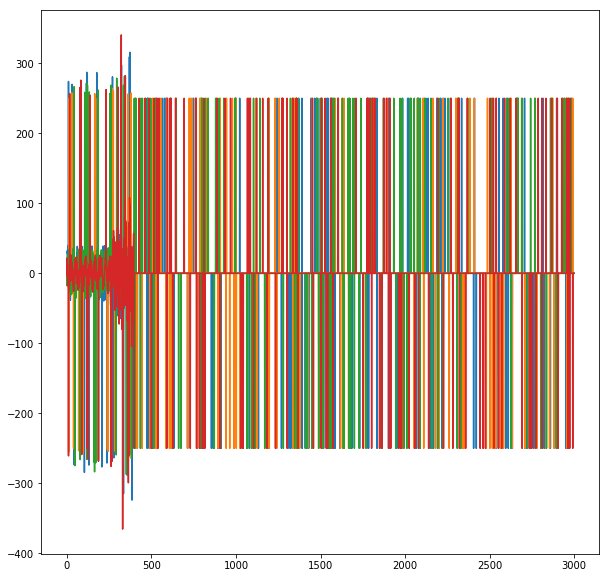

In [341]:
plt.figure(figsize=(10,10))
plt.plot(range(len(data)),data)

Just plotting all the time series data together doesn't provide much information. It would be better to look at each data series visualization individually.


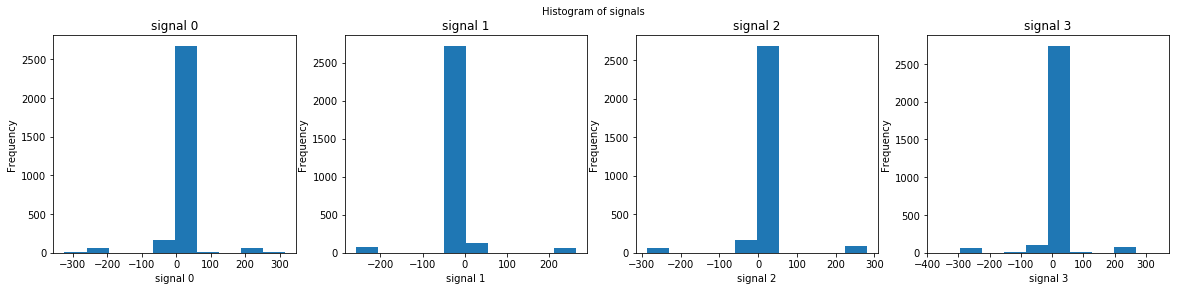

In [344]:
# Histogram of distribution of signals
fig, ((ax1,ax2,ax3,ax4)) = plt.subplots(1,4, figsize=(20,4))
ax1.hist(data.iloc[:,0])
ax1.set(title='signal 0',xlabel='signal 0',ylabel='Frequency')
ax2.hist(data.iloc[:,1])
ax2.set(title='signal 1',xlabel='signal 1',ylabel='Frequency')
ax3.hist(data.iloc[:,2])
ax3.set(title='signal 2',xlabel='signal 2',ylabel='Frequency')
ax4.hist(data.iloc[:,3])
ax4.set(title='signal 3',xlabel='signal 3',ylabel='Frequency')
fig.suptitle('Histogram of signals',fontsize=10)
plt.show()

The histogram distributions show that the signals are mostly distributed at 0. We can also see that the values at greater than 200 and less then -200 can be considered as the outliers or noise and have no effect on the data. This can also be seen from the scatterplots below.

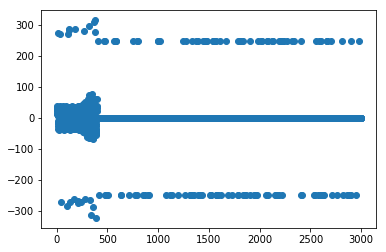

In [345]:
plt.scatter(x=range(len(data)), y=data['0'])

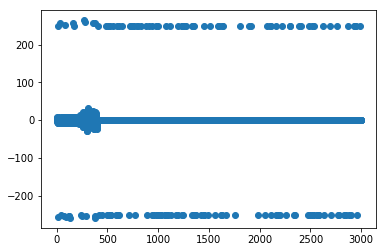

In [13]:
plt.scatter(x=range(len(data)), y=data['1'])

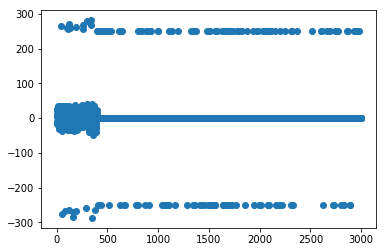

In [14]:
plt.scatter(x=range(len(data)), y=data['2'])

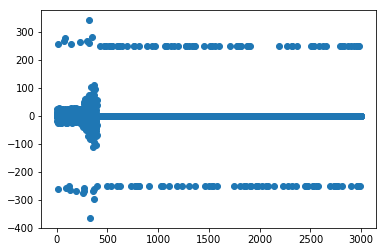

In [346]:
plt.scatter(x=range(len(data)), y=data['3'])

From the individual visualizations, we can infer the following things:

1. Initially, the data points behave in a stable manner but then their behaviour becomes erratic and finally collapses into a straight line along the x axis for all the time series. This matches with the description given in the problem statement of the three modes of the machine: normal mode, where it works predictably, faulty mode where it works eratically and failed mode with 0 value.

2. The other pattern which is common for all the scatterplots are the points lying at y>200 and y<-200. These points have no direct pattern and seem to be the outliers or noise which don't contribute meaningful data to the working of the machine. These outliers have to be removed to get the meaningful data. 

## Removing Outliers/Noise

Outliers can be removed in two ways: by manually removing signal values which are visible outliers like y>200 and y<-200. The other method is use standard (Z) score and remove all data with value higher than 3 as they represent the 0.03% of points which are away from the central value. The Z Score Method is better for generalization across the machines.

In [347]:
# Z Score Method

def Remove_Outliers(data, threshold=3):
    
    # Compute the Z Score
    Z_Score = np.abs(stats.zscore((data)))
    
    # Remove data points with Z Score greater than the threshold
    new_data = data[(Z_Score<threshold).all(axis=1)]
    
    return new_data

In [348]:
New_data = Remove_Outliers(data)
New_data.describe()

,0,1,2,3
count,2458.000000,2458.000000,2458.000000,2458.000000
mean,0.041739,0.012070,-0.107373,0.005865
std,10.696119,3.063050,6.493559,10.359480
min,-68.224301,-29.577809,-36.331749,-113.323937
25%,-0.007959,-0.008448,-0.007939,-0.007429
50%,-0.000195,-0.000334,0.000441,0.000238
75%,0.007446,0.007717,0.007945,0.007944
max,75.535396,32.968753,41.245603,108.147169


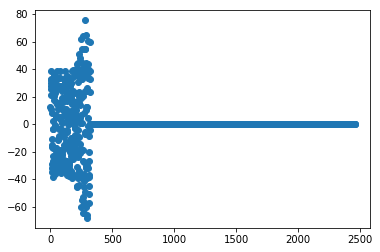

In [349]:
plt.scatter(x=range(len(New_data)), y=New_data['0'])

In [350]:
# Manual Method
clean_data = data[(data['0'] < 200) & (data['0'] > -200) & 
            (data['1'] < 200) & (data['1'] > -200) &
            (data['2'] < 200) & (data['2'] > -200) &
            (data['3'] < 200) & (data['3'] > -200)]
print(clean_data)

                                       0         1          2          3
2019-01-01 00:00:00.000000000  12.626096  8.803120 -11.809200  10.083961
2019-01-01 08:00:09.603201067  10.831994  2.816327  11.554778  21.892853
2019-01-01 16:00:19.206402134  21.083510 -0.672645 -17.839178  -1.349024
2019-01-02 00:00:28.809603201  32.294495  6.525132 -13.498586  -4.250752
2019-01-02 08:00:38.412804268  28.057100  3.691359  21.984744  13.670561
2019-01-02 16:00:48.016005335  29.646637 -3.522426   3.364964  -3.015832
2019-01-03 00:00:57.619206402  38.902674  1.916522 -10.849385 -17.702242
2019-01-03 08:01:07.222407469  33.052626  3.204629  25.474912   1.118645
2019-01-03 16:01:16.825608536  25.190551 -5.460431  22.956234  -3.472719
2019-01-04 00:01:26.428809603  29.554267 -3.325767  -5.842399 -25.124870
2019-01-05 00:01:55.238412804   8.050208 -7.313308  -0.864267 -23.445087
2019-01-05 16:02:14.444814938 -10.995116 -3.537485  32.625962   2.237233
2019-01-06 00:02:24.048016005 -16.832865 -8.559672 

When we remove the datpoints deemed to be outliers from the above condition, we find we have remaining 2458 data points. To plot the time series data now without the outliers, we agian use matplotlib.

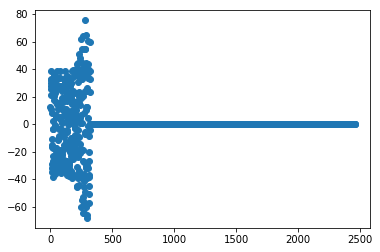

In [190]:
plt.scatter(x=range(len(clean_data)), y=clean_data['0'])

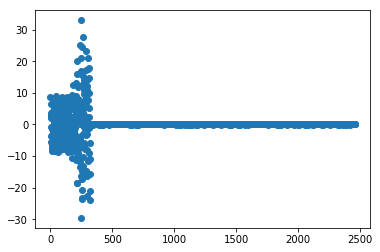

In [351]:
plt.scatter(x=range(len(clean_data)), y=clean_data['1'])

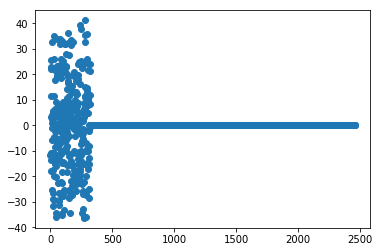

In [21]:
plt.scatter(x=range(len(clean_data)), y=clean_data['2'])

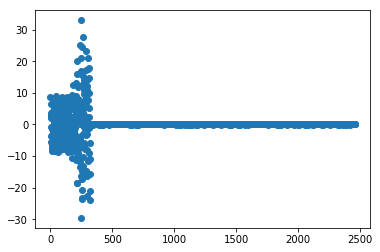

In [22]:
plt.scatter(x=range(len(clean_data)), y=clean_data['1'])

The plots after removing the outliers is as predicted and show the machine in three modes: normal, faulty and failed. 

## Failure Date 

To find the failure data, a rolling window is used. First a new column is added which calculates the mean of the absolute value  of all the readings at each timestamp. Then, according to the size of the window we set, the function checks whether consecutive values of mean is less than 0.1. We know that at failure point, the machine gives output readings close to 0, hence this approximation can be used and generalized for all machines. Once we find the index where we find the first consecutive 0 readings for all the data, we can confidently say that we have identified the start of failure data. Then we can slice the original dataset into two parts: first part consisting of normal and faulty data and the second part consisting of failed data.

In [352]:
# Find the failure data

def failure_points(data, window):
    
    failed = []
    # Add a new column which is the sum of absolute value of each row data point divided by 4
    data['mean'] = data.apply(lambda row: ((abs(row['0'])+abs(row['1'])+abs(row['2'])+abs(row['3'])))/4, axis=1)
    
    for i in range(len(data)- window):
        Flag = True
        for j in range(window):
            if (data.iloc[i+j,4]) > 0.1:
                Flag = False
                break
        
        if Flag == True:
            return i
    
    return -1   

In [353]:
ind = failure_points(New_data,5) 
print(ind)

321


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Thus, we can use this index to find the failure date exactly.

In [354]:
Failure_time = New_data.index[ind]
print(Failure_time)

2019-05-13 09:03:32.470823608


In [355]:
Failure_Data = New_data[ind:]
Failure_Data = Failure_Data.drop('mean', axis =1)
print(Failure_Data)

                                      0         1         2         3
2019-05-13 09:03:32.470823608  0.003946  0.009180  0.004883  0.010035
2019-05-14 09:04:01.280426810 -0.006653 -0.003063 -0.004379  0.002276
2019-05-14 17:04:10.883627876 -0.001126  0.012249 -0.001380  0.006800
2019-05-15 01:04:20.486828944 -0.002541  0.018387 -0.011604 -0.004464
2019-05-15 17:04:39.693231078  0.017978  0.001951 -0.001356 -0.008844
2019-05-16 17:05:08.502834278  0.007554 -0.010361  0.004228  0.006009
2019-05-17 09:05:27.709236412 -0.019765 -0.002415 -0.007655  0.006739
2019-05-17 17:05:37.312437480 -0.015895 -0.006161  0.000022 -0.008796
2019-05-18 01:05:46.915638546  0.002845  0.011294  0.002914  0.002409
2019-05-18 09:05:56.518839614 -0.025668 -0.015102 -0.005239 -0.005138
2019-05-18 17:06:06.122040680 -0.006624 -0.007917  0.010139  0.001209
2019-05-19 01:06:15.725241748 -0.011134 -0.009187  0.001800 -0.023287
2019-05-19 09:06:25.328442814 -0.004703 -0.000633  0.000480  0.030584
2019-05-20 09:06:54.

Now, we can slice the rest of the normal and faulty data together and call it the Final Data.

In [356]:
Final_Data = New_data[0:ind]
Final_Data = Final_Data.drop('mean', axis=1)
print(Final_Data)

                                       0          1          2           3
2019-01-01 00:00:00.000000000  12.626096   8.803120 -11.809200   10.083961
2019-01-01 08:00:09.603201067  10.831994   2.816327  11.554778   21.892853
2019-01-01 16:00:19.206402134  21.083510  -0.672645 -17.839178   -1.349024
2019-01-02 00:00:28.809603201  32.294495   6.525132 -13.498586   -4.250752
2019-01-02 08:00:38.412804268  28.057100   3.691359  21.984744   13.670561
2019-01-02 16:00:48.016005335  29.646637  -3.522426   3.364964   -3.015832
2019-01-03 00:00:57.619206402  38.902674   1.916522 -10.849385  -17.702242
2019-01-03 08:01:07.222407469  33.052626   3.204629  25.474912    1.118645
2019-01-03 16:01:16.825608536  25.190551  -5.460431  22.956234   -3.472719
2019-01-04 00:01:26.428809603  29.554267  -3.325767  -5.842399  -25.124870
2019-01-05 00:01:55.238412804   8.050208  -7.313308  -0.864267  -23.445087
2019-01-05 16:02:14.444814938 -10.995116  -3.537485  32.625962    2.237233
2019-01-06 00:02:24.04801

## Added Feature - Time

The main objective of this challenge is to find the time when the machine starts working in faulty and failed mode. In the given dataset, the time is given in the index and have to be converted into a usable feature.

The main objective is to use a time feature which can be used for all the machines and not just this particular case. This generalization can help in utilizing this feature for the other machines. A way to do this would be to use epoch time, which returns the number of seconds passed since epoch.

In [357]:
def feature_time(data):

    # Convert the index data to time
    data['time'] = pd.to_datetime(data.index, unit='ns')
    index = data.index

    # Convert into epoch time format
    data['epoch time'] = data.time.values.astype(np.int64) // 10**9

    # Remove the time column
    data = data.drop('time', axis=1)
    
    return data


In [358]:
Final_Data = feature_time(Final_Data)

Thus, we have converted the index time to epoch time and found a new feature. This feature would be more helpful if it shows the difference in the times for each reading with the first reading being when the machine starts working. So subtracting each row by the first row value, will give us a feature with time from machine start till breakdown in the format of increasing from 0. 

In [359]:
def time_elapse(data):
    
    # Convert epoch time to the format of time elapsed = epoch time - initial epoch time
    data['time_elapsed'] = data['epoch time'] - data.loc[data.index[0], 'epoch time']

    # Remove the epoch time column
    data = data.drop('epoch time', axis=1)
    
    return data

In [360]:
Final_Data = time_elapse(Final_Data)
print(Final_Data)

                                       0          1          2           3  \
2019-01-01 00:00:00.000000000  12.626096   8.803120 -11.809200   10.083961   
2019-01-01 08:00:09.603201067  10.831994   2.816327  11.554778   21.892853   
2019-01-01 16:00:19.206402134  21.083510  -0.672645 -17.839178   -1.349024   
2019-01-02 00:00:28.809603201  32.294495   6.525132 -13.498586   -4.250752   
2019-01-02 08:00:38.412804268  28.057100   3.691359  21.984744   13.670561   
2019-01-02 16:00:48.016005335  29.646637  -3.522426   3.364964   -3.015832   
2019-01-03 00:00:57.619206402  38.902674   1.916522 -10.849385  -17.702242   
2019-01-03 08:01:07.222407469  33.052626   3.204629  25.474912    1.118645   
2019-01-03 16:01:16.825608536  25.190551  -5.460431  22.956234   -3.472719   
2019-01-04 00:01:26.428809603  29.554267  -3.325767  -5.842399  -25.124870   
2019-01-05 00:01:55.238412804   8.050208  -7.313308  -0.864267  -23.445087   
2019-01-05 16:02:14.444814938 -10.995116  -3.537485  32.625962  

Thus we have added a new feature which deals with the time elapsed.

## Fault Point

The next objective is to find the fault point and separate the normal and faulty data. The dataset has four kinds of time series data and a feature for the time elapsed since start of the machine. The first thing to do would be to create individual dataframes consisting of the index,individual timeseries data and the time elapsed.

In [361]:
def create_dataset_0(data):
    
    Data = data[['0','time_elapsed']].copy()
    return Data

In [362]:
Dataset_0 = create_dataset_0(Final_Data)
print(Dataset_0)

                                       0  time_elapsed
2019-01-01 00:00:00.000000000  12.626096             0
2019-01-01 08:00:09.603201067  10.831994         28809
2019-01-01 16:00:19.206402134  21.083510         57619
2019-01-02 00:00:28.809603201  32.294495         86428
2019-01-02 08:00:38.412804268  28.057100        115238
2019-01-02 16:00:48.016005335  29.646637        144048
2019-01-03 00:00:57.619206402  38.902674        172857
2019-01-03 08:01:07.222407469  33.052626        201667
2019-01-03 16:01:16.825608536  25.190551        230476
2019-01-04 00:01:26.428809603  29.554267        259286
2019-01-05 00:01:55.238412804   8.050208        345715
2019-01-05 16:02:14.444814938 -10.995116        403334
2019-01-06 00:02:24.048016005 -16.832865        432144
2019-01-06 08:02:33.651217072 -15.356800        460953
2019-01-07 00:02:52.857619206 -34.854982        518572
2019-01-07 08:03:02.460820273 -28.675845        547382
2019-01-07 16:03:12.064021340 -31.902538        576192
2019-01-08

Then we can use clustering to find the two different clusters of normal and faulty data. I have used KMeans Clustering to differentiate the data into two parts: Normal Mode and Faulty Mode.

In [363]:
def cluster(data):
    kmeans= KMeans(n_clusters=2, max_iter=100, random_state=0).fit_predict(data)
    data['cluster'] = kmeans
    return data

In [364]:
Dataset_0 = cluster(Dataset_0)

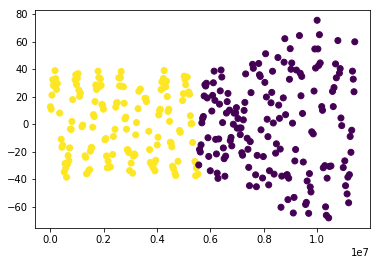

In [365]:
plt.scatter(x=Dataset_0['time_elapsed'], y=Dataset_0['0'], c=Dataset_0['cluster'])

As can be seen from the visualization, the clustering algorithm works and differentiates it into two clusters. We can also check the values of the clusters to see that Cluster 1 indicates that the machine is working in normal mode and Cluster 0 indicates that the machine is working in faulty mode. We can use this cluster id to separate the data.

In [366]:
def normal_list(data):
    # Create a list for normal working for timeseries data
    Normal_List= []

    # Fill up corresponding values from data
    for i in range(len(data)):
        if data.iloc[i,2]==1:
            Normal_List.append(data.index[i])
            
    return Normal_List        

In [367]:
Normal_list_0 = normal_list(Dataset_0)

In [368]:
def faulty_list(data):
    # Create a list for faulty working for timeseries data 
    Faulty_List= []

    # Fill up corresponding values from dataset
    for i in range(len(data)):
        if data.iloc[i,2]==0:
            Faulty_List.append(data.index[i])
            
    return Faulty_List        

In [369]:
Faulty_list_0 = faulty_list(Dataset_0)

Similar steps are done for all the indivual time series data.

In [370]:
def create_dataset_1(data):
    
    Data = data[['1','time_elapsed']].copy()
    return Data

def create_dataset_2(data):
    
    Data = data[['2','time_elapsed']].copy()
    return Data

def create_dataset_3(data):
    
    Data = data[['3','time_elapsed']].copy()
    return Data

In [371]:
Dataset_1 = create_dataset_1(Final_Data)
Dataset_2 = create_dataset_2(Final_Data)
Dataset_3 = create_dataset_3(Final_Data)

In [372]:
Dataset_1 = cluster(Dataset_1)

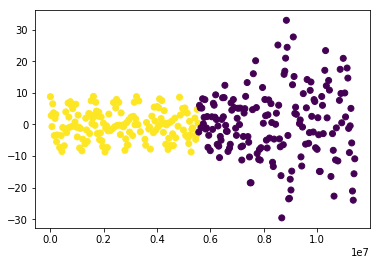

In [373]:
plt.scatter(x=Dataset_1['time_elapsed'], y=Dataset_1['1'], c=Dataset_1['cluster'])

In [374]:
Normal_list_1 = normal_list(Dataset_1)
Faulty_list_1 = faulty_list(Dataset_1)

In [375]:
Dataset_2 = cluster(Dataset_2)

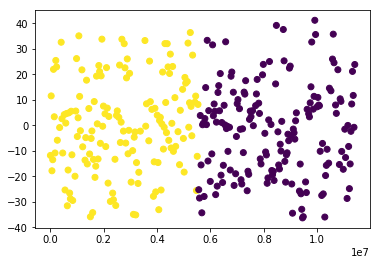

In [376]:
plt.scatter(x=Dataset_2['time_elapsed'], y=Dataset_2['2'], c=Dataset_2['cluster'])

In [377]:
Normal_list_2 = normal_list(Dataset_2)
Faulty_list_2 = faulty_list(Dataset_2)

In [378]:
Dataset_3 = cluster(Dataset_3)

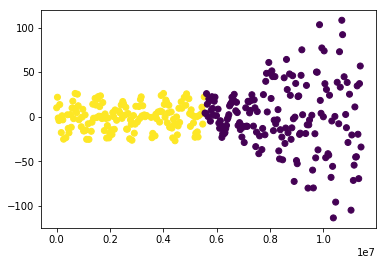

In [379]:
plt.scatter(x=Dataset_3['time_elapsed'], y=Dataset_3['3'], c=Dataset_3['cluster'])

In [380]:
Normal_list_3 = normal_list(Dataset_3)
Faulty_list_3 = faulty_list(Dataset_3)

Now to check the initial values and compare them in the four cases for faulty list. This will give the start of the fault in machine date

In [381]:
def minimum(data0,data1,data2,data3):
    Min = min(data0[0],data1[0],data2[0],data3[0])
    return Min

In [382]:
Fault_Time = minimum(Faulty_list_0,Faulty_list_1,Faulty_list_2,Faulty_list_3)
print(Fault_Time)

2019-03-06 08:30:53.417805936


Thus, we have found the Fault date too.

## Visualization of Result

Here is the visualization of the fault date and failure date we found for one of the timeseries dataset.

In [383]:
def final_plot(data,time1,time2):
    fig, ax = plt.subplots(1,1,figsize=(20,10))
    dates= pd.to_datetime(data.index)
    ax.fmt_xdata = mdates.DateFormatter('%Y-%m')
    ax.set(title='Machine signal 0')
    ax.plot(dates,data['0'],label='0th signal',color= 'blue', animated=True,linewidth=0.5)
    ax.axvline(time1,label='Entering Faulty mode '+ str(time1),c='red',linewidth=2)
    ax.axvline(time2,label='Entering Failure mode '+ str(time2),c='black',linewidth=2)
    ax.legend()
    plt.show()

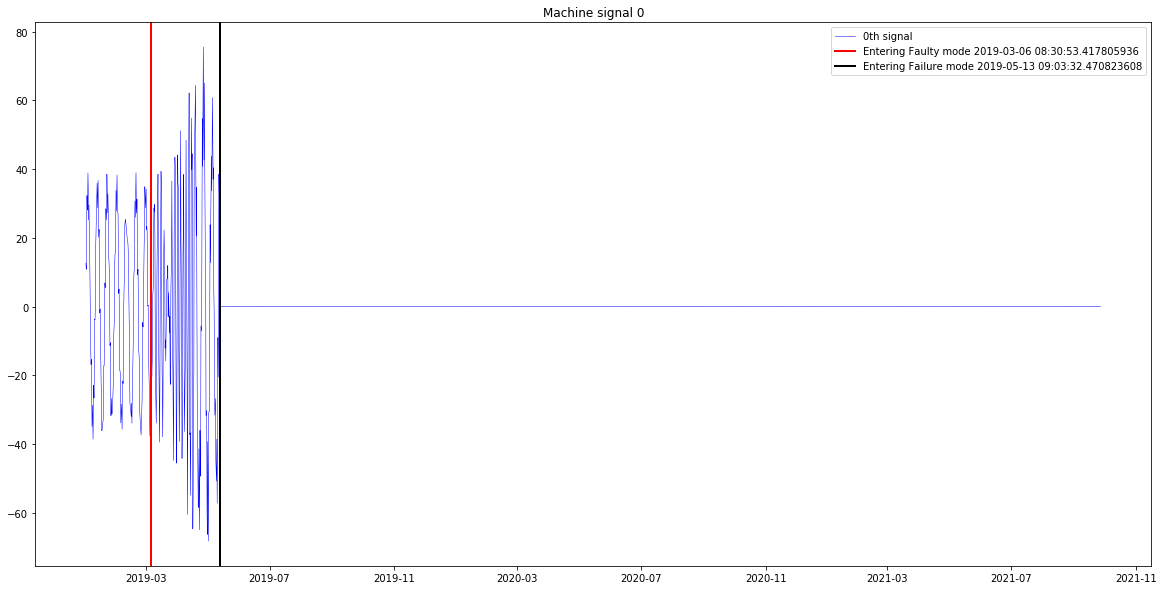

In [332]:
final_plot(New_data,Fault_Time,Failure_time)

This plot is for the signal 0 from machine 0. The blue line represents the timeseries data. The red line represents the point where the machine has entered faulty mode. The black line represents the point where the machine has entered failed mode. 

Looking at the visualization, the clustering algorithm looks to be working for this particular machine. The failure in the machine is detected pretty early so that there's time to prevent the machine entering failed mode. 

## Full workflow

In [384]:
def workflow(data):
    New_data = Remove_Outliers(data)
    ind = failure_points(New_data,5) 
    Failure_time = New_data.index[ind]
    Failure_Data = New_data[ind:]
    Failure_Data = Failure_Data.drop('mean', axis =1)
    Final_Data = New_data[0:ind]
    Final_Data = Final_Data.drop('mean', axis=1)
    Final_Data = feature_time(Final_Data)
    Final_Data = time_elapse(Final_Data)
    Dataset_0 = create_dataset_0(Final_Data)
    Dataset_0 = cluster(Dataset_0)
    Normal_list_0 = normal_list(Dataset_0)
    Faulty_list_0 = faulty_list(Dataset_0)
    Dataset_1 = create_dataset_1(Final_Data)
    Dataset_1 = cluster(Dataset_1)
    Normal_list_1 = normal_list(Dataset_1)
    Faulty_list_1 = faulty_list(Dataset_1)
    Dataset_2 = create_dataset_2(Final_Data)
    Dataset_2 = cluster(Dataset_2)
    Normal_list_2 = normal_list(Dataset_2)
    Faulty_list_2 = faulty_list(Dataset_2)
    Dataset_3 = create_dataset_3(Final_Data)
    Dataset_3 = cluster(Dataset_3)
    Normal_list_3 = normal_list(Dataset_3)
    Faulty_list_3 = faulty_list(Dataset_3)
    Fault_Time = minimum(Faulty_list_0,Faulty_list_1,Faulty_list_2,Faulty_list_3)
    final_plot(New_data,Fault_Time,Failure_time)

To test this workflow and the results, Let's test it on a different machine, say, Machine 11.

In [385]:
data = pd.read_csv('machine_11.csv', index_col=0)
print(data.head())

                                       0         1          2          3
2019-01-01 00:00:00.000000000  12.619190  8.822951 -11.786292  10.064528
2019-01-01 08:00:09.603201067  10.823407  2.797931  11.562981  21.887692
2019-01-01 16:00:19.206402134  21.094514 -0.644464 -17.826078  -1.360316
2019-01-02 00:00:28.809603201  32.296052  6.535904 -13.510324  -4.259116
2019-01-02 08:00:38.412804268  28.077653  3.687200  21.982494  13.636488


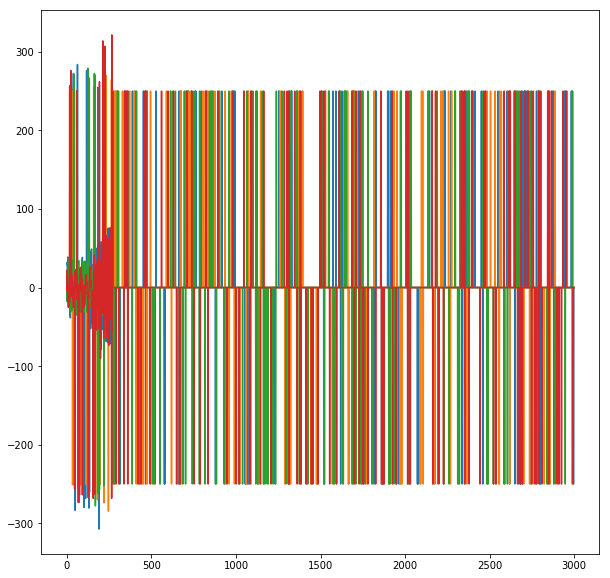

In [386]:
plt.figure(figsize=(10,10))
plt.plot(range(len(data)),data)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


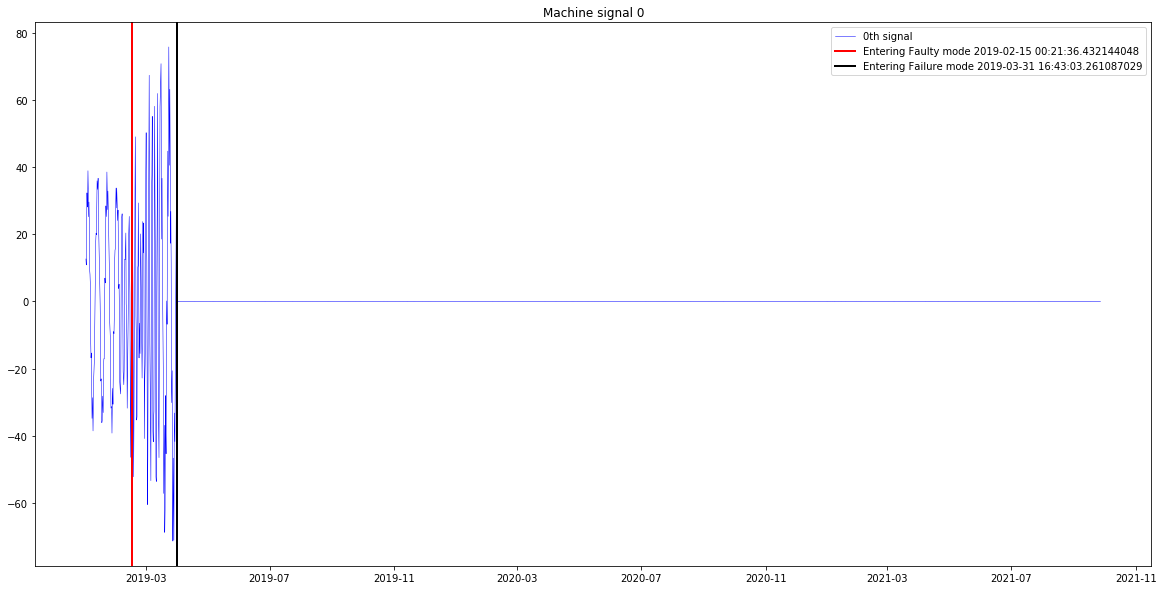

In [387]:
workflow(data)

Thus, in this case too, the workflow seems to differentiate between the three modes of the machine - normal, faulty and failed.

We need to just call the workflow function on the dataset to get the results.

## Strengths and Limitations of this method

The first limitations which needed to be discussed are the assumptions taken during the whole workflow. They are:

1. While removing outliers through the Z score, the threshold is set at 3 which represents the 0.03% of the points which are away from the central position. This histogram may vary for a different machine and the threshold would have to be set accordingly for that machine.
2. While testing for failed readings from the machine, the rolling window method is used with size of the window set to 5. Again this value is chosen randomly and can differ to a different machine based on how the readings from the normal and faulty mode are compared to failed mode. If the values from normal and faulty mode are closer to 0, the rolling window can give wrong results.

The next limitation is based on the clustering algorithm itself. After removing the failed data, when the remaining data is only normal mode and faulty mode and if there is imbalance in the amount for each type, then clustering will give wrong results. For example, if the working of the machine in normal mode is less, then, the datapoints related to faulty mode will be much more than those related to normal mode and hence the clustering will give wrong results. The vice versa will also be true.

Thus, the limitations of K Means clustering algorithm apply to this problem as well.


On the other hand the strengths of the algorithm is that the algorithm itself is simple to implement and scales well to large datasets. Also, the clustering algorithm always promises convergence. And as can be seen from above, it works pretty well on new examples of data. 

## Other Approaches

Some other approaches to attempt this problem:

1. **Time-Series Approach:**

As can be seen from the data, the machine works with regular patterns in normal mode, erratic pattern in faulty mode and close to 0 readings in failed mode. Thus an ARIMA model, which is a general regressive model for time-series modeling, can be utilized here. The predicted values from the model, in this case, will be compared with actual values and if there is a difference greater than a threshold, then the readings can be marked as faulty readings.

2. **Rolling Window Statistics Approach:**

Another method which can be used is a rolling windo based on the standard deviation of the data and a threhold. It will be a method with limitations as according to the machine, the window size and the threshold would have to be changed. In this method, the standard deviation of the data would be calculated, and based on the threshold we set for the rolling window, if the particular datapoints value differs from the standard deviation greater than the threshold, then the readings will be marked as faulty readings.

3. **AutoEncoder Approach:**

An autoencoder may be used to detect the faulty mode and separate it from the normal mode of the machine. A Deep Autoencoder Mixture Clustering(DAMIC) algorithm can be used to do the clustering into normal and faulty mode.  
